In [1]:
from experiment_utils import generate_blob_data, add_noise, get_graph, visuallize_graph, denoise_experiment, compare_denoised_signal
import numpy as np
from sklearn.datasets import make_blobs
## the output seems to be too much for this notebook, disabling tqdm.
from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True) 

In [2]:
np.random.seed(32)
adata = generate_blob_data(n_cells=1000, n_genes=500, n_clusters=3, cluster_std=10.0, center_box=(-5, 5))

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


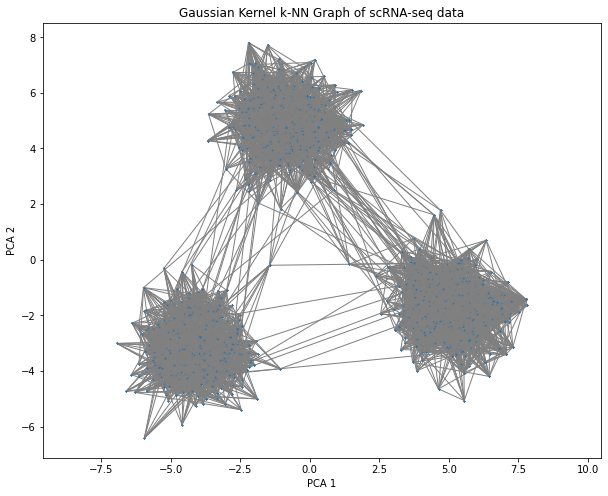

In [3]:
visuallize_graph(get_graph(adata))

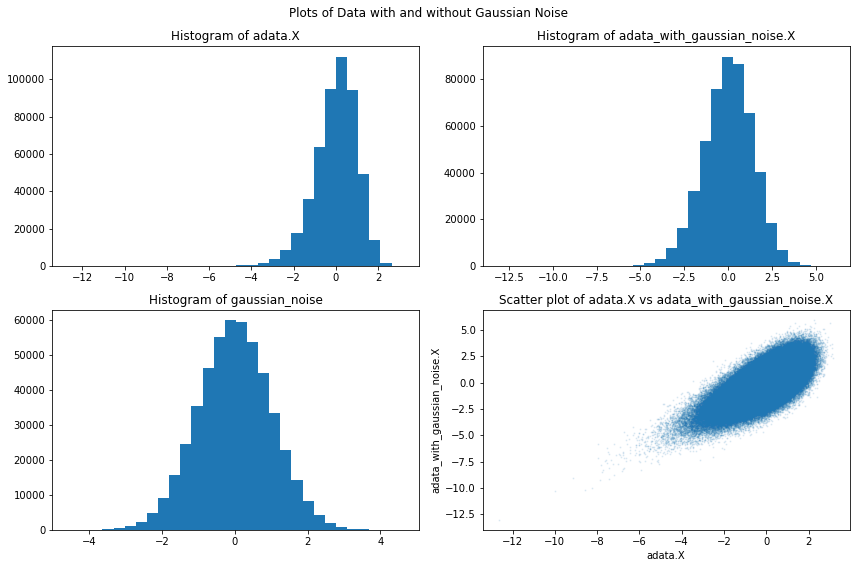

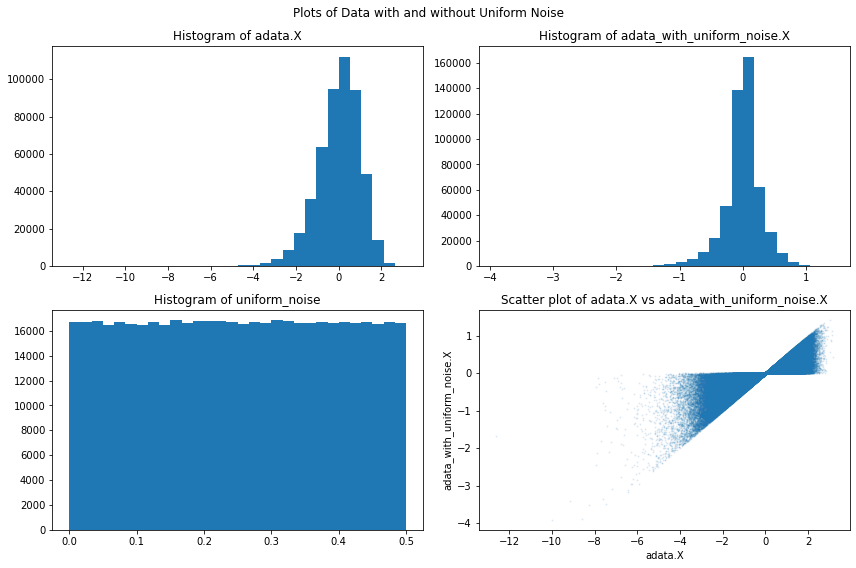

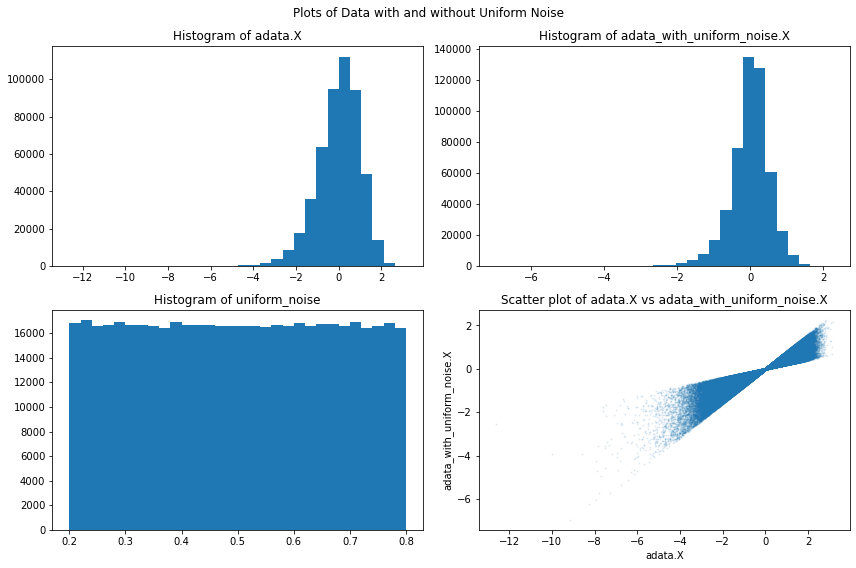

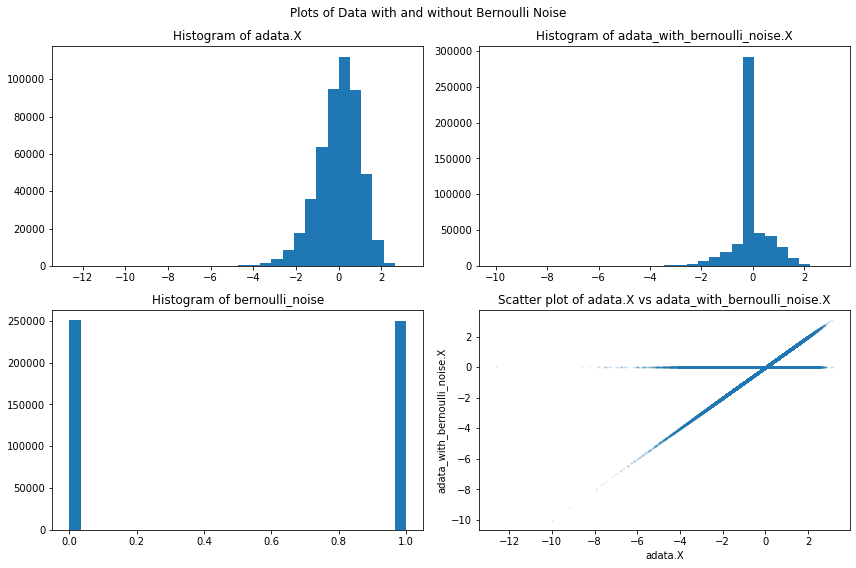

In [4]:
adata_gaussian = add_noise(adata, noise_type='gaussian', mean=0, std=1, noise_scale=1)
adata_uniform1 = add_noise(adata, noise_type='uniform', low=0, high=0.5)
adata_uniform2 = add_noise(adata, noise_type='uniform', low=0.2, high=0.8)
adata_bernoulli = add_noise(adata, noise_type='bernoulli', probability=0.5)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']
2023-04-26 12:49:18,643:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


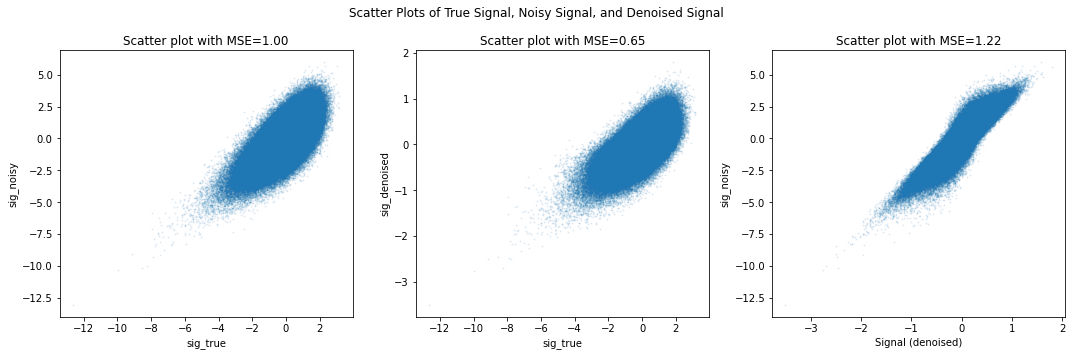

In [5]:
pygsp_graph = get_graph(adata_gaussian)
sig_denoised_gaussian = denoise_experiment(pygsp_graph, adata_gaussian.X, 'gaussian')
mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


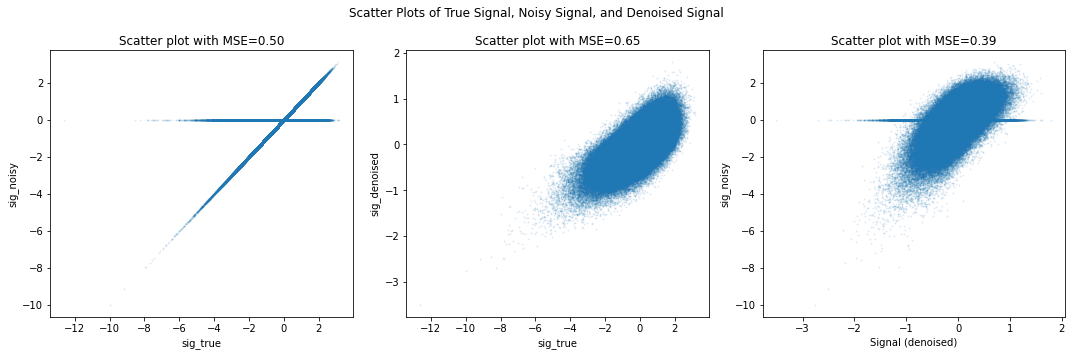

In [6]:
pygsp_graph = get_graph(adata_bernoulli)
sig_denoised_bernoulli = denoise_experiment(pygsp_graph, adata_bernoulli.X, 'bernoulli')
mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, sig_denoised_gaussian)

In [7]:
mse_dict_gaussian

{'MSE noisy': 1.0034318,
 'MSE denoised': 0.6510786440004143,
 'MSE denoised vs noisy': 1.2222917730846043}

In [8]:
mse_dict_bernoulli

{'MSE noisy': 0.500934,
 'MSE denoised': 0.6510786440004143,
 'MSE denoised vs noisy': 0.38503201594921704}

In [9]:
pygsp_graph = get_graph(adata_uniform1)
sig_denoised_uniform1 = denoise_experiment(pygsp_graph, adata_uniform1.X, 'uniform')
mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


-48532.62054621958
Truth unknown


ValueError: Rank(A) < p or Rank([P; A; G]) < n

In [ ]:
pygsp_graph = get_graph(adata_uniform2)
sig_denoised_uniform2 = denoise_experiment(pygsp_graph, adata_uniform2.X, 'uniform')
mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, sig_denoised_gaussian)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/Spectral-Denoising/experiment_utils.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  graph = adata.uns['neighbors']['connectivities']


-51227.61575768388
Truth unknown


TypeError: buffer format not supported

In [10]:
import magic

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.26 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.29 seconds.


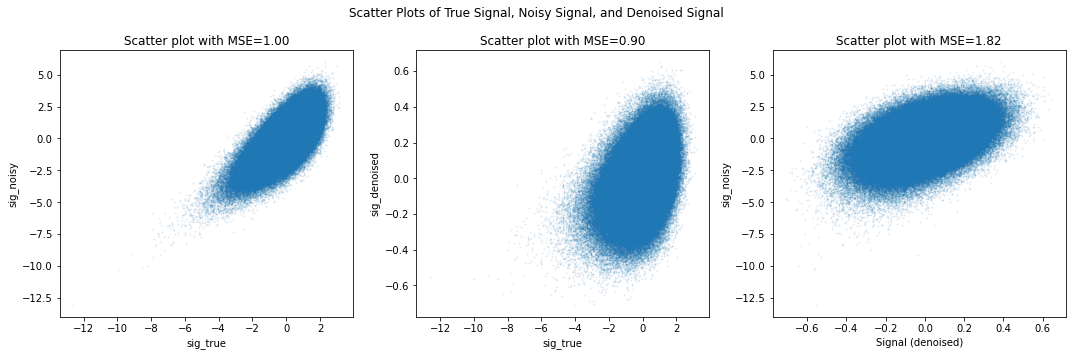

In [11]:
magic_op = magic.MAGIC()
magic_denoised_gaussian = magic_op.fit_transform(adata_gaussian.X)
magic_mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, magic_denoised_gaussian)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.27 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.30 seconds.


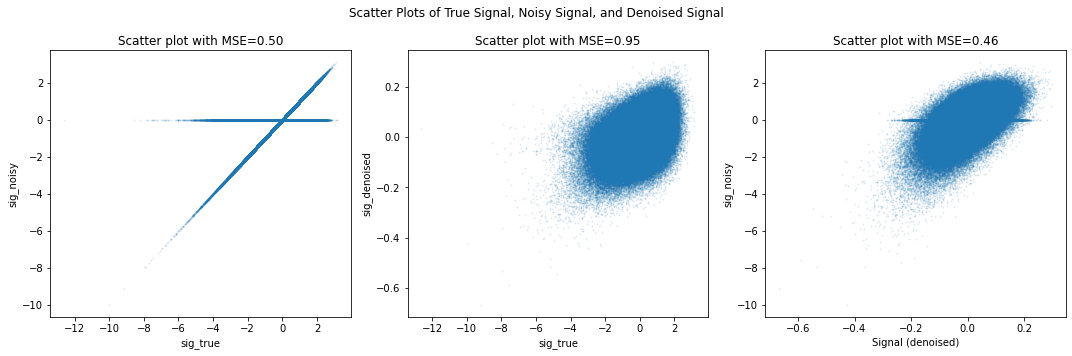

In [12]:
magic_op = magic.MAGIC()
magic_denoised_bernoulli = magic_op.fit_transform(adata_bernoulli.X)
magic_mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, magic_denoised_bernoulli)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.39 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.42 seconds.


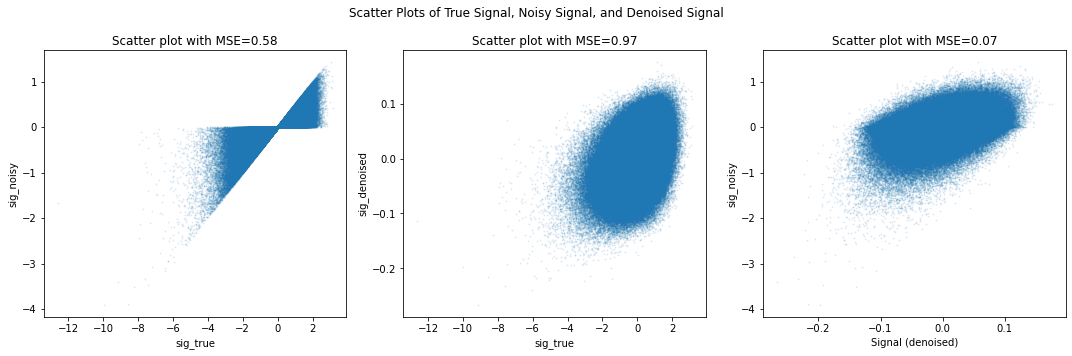

In [13]:
magic_op = magic.MAGIC()
magic_denoised_uniform1 = magic_op.fit_transform(adata_uniform1.X)
magic_mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, magic_denoised_uniform1)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.29 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.31 seconds.


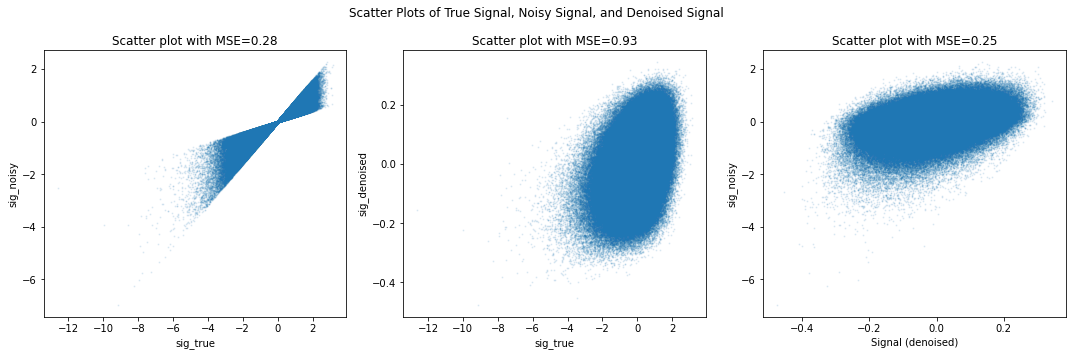

In [14]:
magic_op = magic.MAGIC()
magic_denoised_uniform2 = magic_op.fit_transform(adata_uniform2.X)
magic_mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, magic_denoised_uniform2)

In [15]:
magic_mse_dict_gaussian

{'MSE noisy': 1.0034318,
 'MSE denoised': 0.9000126774822231,
 'MSE denoised vs noisy': 1.8241447767925283}

In [16]:
magic_mse_dict_bernoulli

{'MSE noisy': 0.500934,
 'MSE denoised': 0.9482997499555483,
 'MSE denoised vs noisy': 0.4567380247112652}